# Simulating FUCCI trajectories

This notebook shows how to **simulate synthetic FUCCI trajectories** and
corresponding cell-cycle phase dynamics.

In this notebook you will:

- generate synthetic FUCCI traces with controllable noise and cycle lengths,
- apply FUCCIphase to the simulated data,
- compare ground-truth phase to the estimated phase.

Use this notebook to test the behaviour of FUCCIphase under controlled
conditions, or to create toy datasets for teaching and benchmarking.


In [3]:
# Imports
import json

import matplotlib.pyplot as plt
import numpy as np

from fucciphase.sensor import FUCCISASensor, accumulation_function, degradation_function


# Estimating sensor data

We took this [paper](https://doi.org/10.1016/j.molcel.2017.10.001) and used Fig. 1 and the Supplementary Material, Fig. S2 to estimate the relevant properties.

The time constants `k` can be converted by using:
`sigma = 100 * (1 / k) / duration`
The duration was taken from Fig. 1G.
The centers were guessed so that the phase boundaries roughly match.
The parameters are stored in the `example_data/` folder and read in the following cell.

In [5]:
with open("example_data/fuccisa_hela_molcel_2017.json") as json_file:
    data = json.load(json_file)
sensor = FUCCISASensor(
    phase_percentages=data["phase_percentages"],
    center=data["center"],
    sigma=data["sigma"],
)

In [6]:
percentages = np.linspace(0, 100, num=100)
ch1_intensity, ch2_intensity = sensor.get_expected_intensities(percentages)

## Plot intensity over percentage

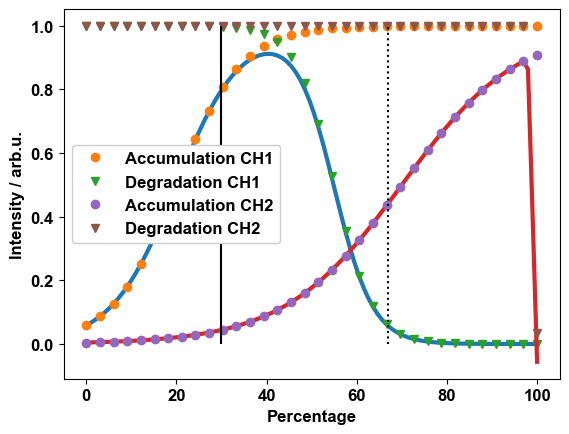

In [7]:
duration = 15.35
g1_perc = data["phase_percentages"][0]
g1s_perc = data["phase_percentages"][1]
peak = 1.0

plt.plot(percentages, ch1_intensity, lw=3)
plt.plot(
    percentages,
    accumulation_function(percentages, data["center"][0], data["sigma"][0]),
    "o",
    label="Accumulation CH1",
    markevery=3,
)

plt.plot(
    percentages,
    degradation_function(percentages, data["center"][1], data["sigma"][1]),
    "v",
    label="Degradation CH1",
    markevery=3,
)


plt.plot(percentages, ch2_intensity, lw=3)
plt.plot(
    percentages,
    accumulation_function(percentages, data["center"][2], data["sigma"][2]),
    "o",
    label="Accumulation CH2",
    markevery=3,
)
plt.plot(
    percentages,
    degradation_function(percentages, data["center"][3], data["sigma"][3]),
    "v",
    label="Degradation CH2",
    markevery=3,
)
plt.vlines(g1_perc, 0, peak, color="black")
plt.vlines(g1_perc + g1s_perc, 0, peak, color="black", linestyles="dotted")
plt.legend()
plt.xlabel("Percentage")
plt.ylabel("Intensity / arb.u.")
plt.show()

## Plot intensity over time

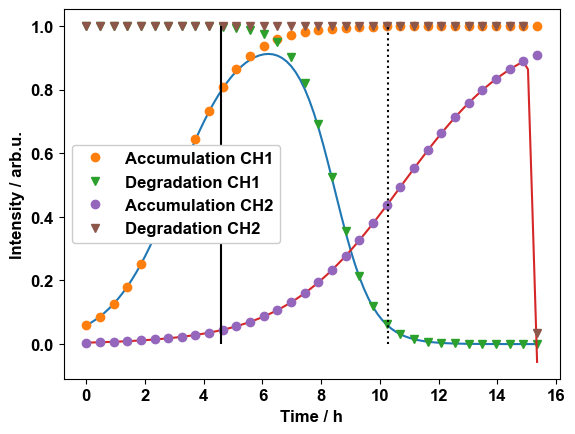

In [8]:
plt.plot(duration * percentages / 100, ch1_intensity)
plt.plot(
    duration * percentages / 100,
    accumulation_function(percentages, data["center"][0], data["sigma"][0]),
    "o",
    label="Accumulation CH1",
    markevery=3,
)
plt.plot(
    duration * percentages / 100,
    degradation_function(percentages, data["center"][1], data["sigma"][1]),
    "v",
    label="Degradation CH1",
    markevery=3,
)

plt.plot(duration * percentages / 100, ch2_intensity)
plt.plot(
    duration * percentages / 100,
    accumulation_function(percentages, data["center"][2], data["sigma"][2]),
    "o",
    label="Accumulation CH2",
    markevery=3,
)
plt.plot(
    duration * percentages / 100,
    degradation_function(percentages, data["center"][3], data["sigma"][3]),
    "v",
    label="Degradation CH2",
    markevery=3,
)
plt.vlines(duration * g1_perc / 100, 0, peak, color="black")
plt.vlines(
    duration * (g1_perc + g1s_perc) / 100, 0, peak, color="black", linestyles="dotted"
)
plt.xlabel("Time / h")
plt.ylabel("Intensity / arb.u.")
plt.legend()
plt.show()